In [133]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [196]:
def detect_pipes_numbers(image_path):
    src = cv.imread(image_path)
    src = cv.cvtColor(src, cv.COLOR_BGR2RGB)

    gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
    gray = cv.blur(gray, (3, 3))

    detected_circles = cv.HoughCircles(gray, 
                                   cv.HOUGH_GRADIENT, 
                                   1, 15, 
                                   param1 = 200, param2 = 24,  
                                   minRadius = 0, maxRadius = 33)
    
    image = src.copy()
    pipes_count = 0
    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles)) # Convert circle metadata to integers

        for points in detected_circles[0, :]:
            a, b, r = points[0], points[1], points[2]

            cv.circle(image, (a, b), r, (0, 255, 0), 2)

            cv.circle(image, (a, b), 1, (255, 0, 0), 3)

            pipes_count += 1

    print("Total pipes: ", pipes_count)
    plt.imshow(image)
    plt.show()


Total pipes:  79


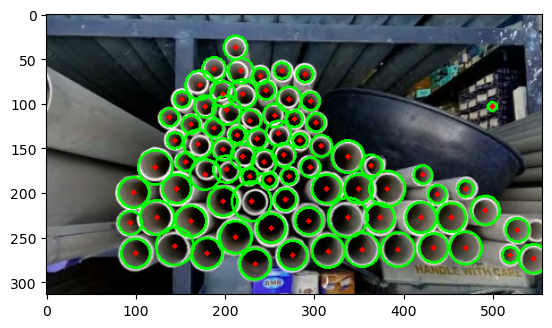

Total pipes:  134


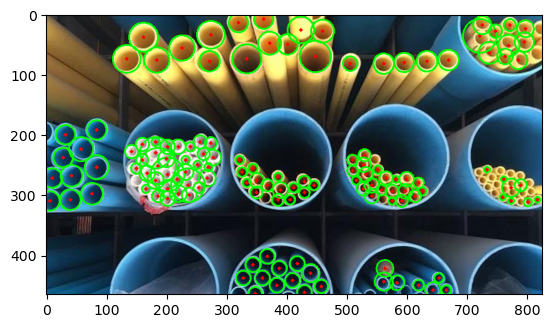

Total pipes:  90


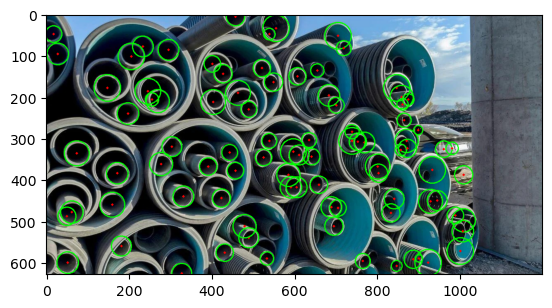

In [198]:
image_folder = "pipes/"

for img in os.listdir(image_folder):
    image_path = os.path.join(image_folder, img)
    detect_pipes_numbers(image_path)
    

Total pipes:  53


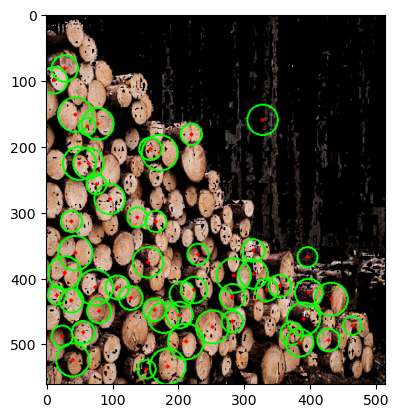

In [390]:
src = cv.imread("logs/logs-2.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)


src_hsv = cv.cvtColor(src, cv.COLOR_RGB2HSV)
wellplate = np.copy(src)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
x = np.where( (src_hsv[:,:,0]>0) & (src_hsv[:,:,0]<15) ) 

mask[x] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
plt.imshow(masked_img)

gray = cv.cvtColor(masked_img, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))

detected_circles = cv.HoughCircles(gray, 
                                cv.HOUGH_GRADIENT, 
                                1, 15, 
                                param1 = 130, param2 = 20,  
                                minRadius = 13, maxRadius = 28
)
image = masked_img.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles)) # Convert circle metadata to integers

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)

        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total pipes: ", pipes_count)
plt.imshow(image)
plt.show()


Total pipes:  56


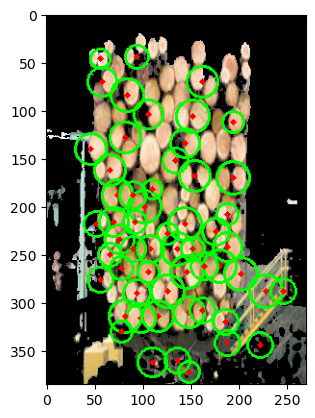

In [465]:
src = cv.imread("logs/logs-1.jpg")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)


src_hsv = cv.cvtColor(src, cv.COLOR_RGB2HSV)
wellplate = np.copy(src)
mask = np.zeros(shape=wellplate.shape[0:2], dtype="bool")
x = np.where( (src_hsv[:,:,0]>0) & (src_hsv[:,:,0]<88) ) 

mask[x] = 1

masked_img = wellplate[:]
masked_img[np.logical_not(mask)] = 0
plt.imshow(masked_img)

gray = cv.cvtColor(masked_img, cv.COLOR_RGB2GRAY)
gray = cv.blur(gray, (3, 3))

detected_circles = cv.HoughCircles(gray, 
                                cv.HOUGH_GRADIENT, 
                                1, 15, 
                                param1 = 200, param2 = 12,  
                                minRadius = 10, maxRadius =18
)
image = masked_img.copy()
pipes_count = 0
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles)) # Convert circle metadata to integers

    for points in detected_circles[0, :]:
        a, b, r = points[0], points[1], points[2]

        cv.circle(image, (a, b), r, (0, 255, 0), 2)

        cv.circle(image, (a, b), 1, (255, 0, 0), 3)

        pipes_count += 1

print("Total pipes: ", pipes_count)
plt.imshow(image)
plt.show()
